pilot study -p001 -Sanjana

In [3]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd


file1 = r'D:\Mine\MScHCI\MSc_HCI\Thesis\webapp\interactionlog_p003.1.csv'
file2 = r'D:\Mine\MScHCI\MSc_HCI\Thesis\webapp\interactionlog_p003.3.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
p001 = pd.concat([df1, df2], ignore_index=True)

print(p001)
print(p001.columns)

                      Timestamp             Interface              Action  \
0    2024-08-09T16:07:59.919610                 Audio        Play t24.mp3   
1    2024-08-09T16:08:06.183042  Steering Wheel Touch  Change Temperature   
2    2024-08-09T16:08:06.675227  Steering Wheel Touch  Change Temperature   
3    2024-08-09T16:08:07.106979  Steering Wheel Touch  Change Temperature   
4    2024-08-09T16:08:13.012483  Steering Wheel Touch  Change Temperature   
..                          ...                   ...                 ...   
160  2024-08-09T16:35:46.988266   Steering Wheel Knob  Change Temperature   
161  2024-08-09T16:36:01.492510                 Audio        Play t25.mp3   
162  2024-08-09T16:36:04.501314   Steering Wheel Knob  Change Temperature   
163  2024-08-09T16:36:04.821226   Steering Wheel Knob  Change Temperature   
164  2024-08-09T16:36:05.166910   Steering Wheel Knob  Change Temperature   

     Temperature  Elapsed Time  
0             15     41.386078  
1        

Completion time

In [23]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Hisham Jaleel\AppData\Local\Temp\ipykernel_20508\3267856237.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Interface', y='Completion Time', data=box_plot_df, palette='Set2')


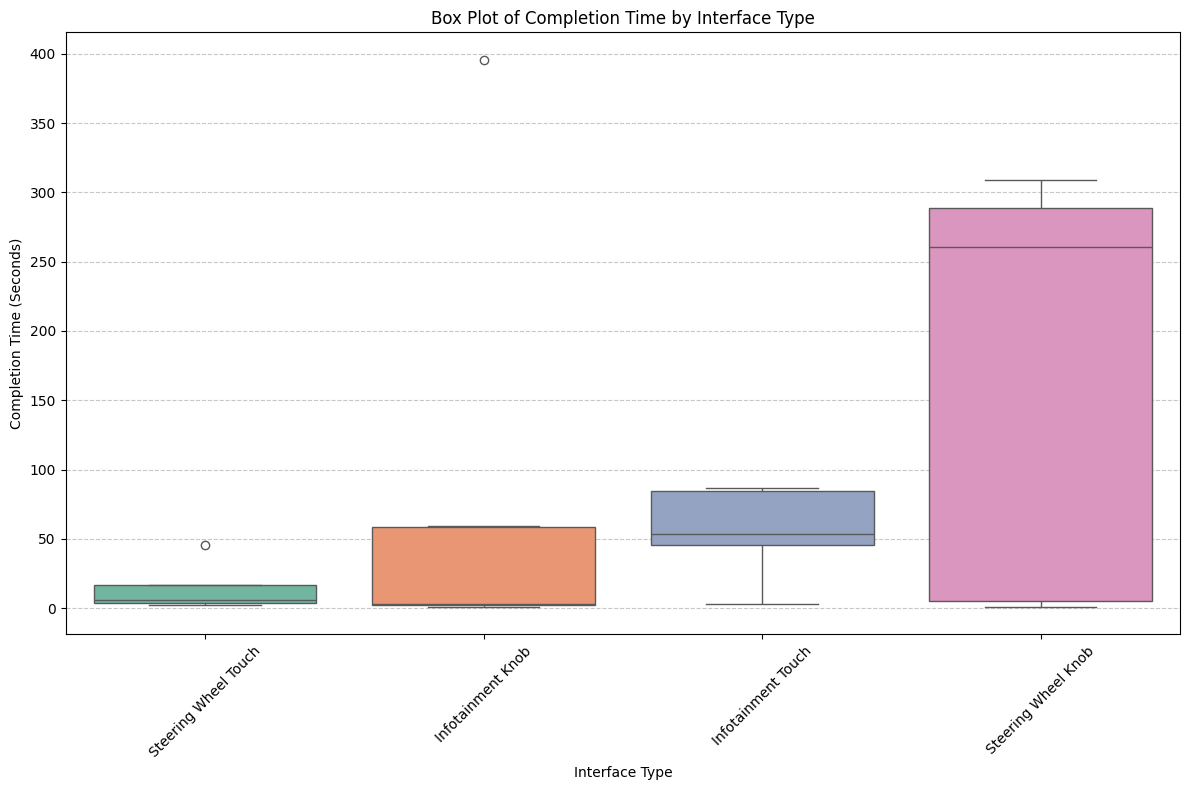

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Timestamp' to datetime if not already done
p001['Timestamp'] = pd.to_datetime(p001['Timestamp'])

# Define the function to calculate completion time
def calculate_completion_time(df, instruction_time, target_temp):
    df_after_instruction = df[df['Timestamp'] > instruction_time]
    df_target = df_after_instruction[df_after_instruction['Temperature'] == target_temp]
    
    if df_target.empty:
        return None
    
    start_time = df_after_instruction.iloc[0]['Elapsed Time']
    end_time = df_target.iloc[-1]['Elapsed Time']
    
    return end_time - start_time

# Filter out 'Audio' and create a list of unique interface types
interfaces = p001[p001['Interface'] != 'Audio']['Interface'].unique()

# Prepare data for box plot
box_plot_data = []

for interface in interfaces:
    interface_df = p001[p001['Interface'] == interface]
    
    # Identify rows where the action is playing a new target temperature instruction
    instructions = p001[p001['Action'].str.contains('Play')]
    
    completion_times = []
    for index, row in instructions.iterrows():
        instruction_time = row['Timestamp']
        target_temp = int(row['Action'].split('t')[1].split('.')[0])  # Extracting target temperature from instruction
        completion_time = calculate_completion_time(interface_df, instruction_time, target_temp)
        
        if completion_time is not None:
            completion_times.append(completion_time)
    
    # Add completion times to the data for the box plot
    if completion_times:
        box_plot_data.extend([(interface, time) for time in completion_times])

# Create a DataFrame for plotting
box_plot_df = pd.DataFrame(box_plot_data, columns=['Interface', 'Completion Time'])

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Interface', y='Completion Time', data=box_plot_df, palette='Set2')
plt.xlabel('Interface Type')
plt.ylabel('Completion Time (Seconds)')
plt.title('Box Plot of Completion Time by Interface Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
